In [34]:
import pandas as pd
import numpy as np

## Here i just import the files import the files
### The Link:https://www.machinehack.com/course-status/

In [36]:
data_train = pd.read_excel('C://Users//atul/Desktop/Coaching/data/Data_Train.xlsx')

In [37]:
data_test = pd.read_excel('C://Users//atul/Desktop/Test_set.xlsx')

In [38]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [39]:
data_train['Journey_Day'] = pd.to_datetime(data_train.Date_of_Journey, format='%d/%m/%Y').dt.day
data_train['Journey_Month'] = pd.to_datetime(data_train.Date_of_Journey, format='%d/%m/%Y').dt.month
data_test['Journey_Day'] = pd.to_datetime(data_test.Date_of_Journey, format='%d/%m/%Y').dt.day
data_test['Journey_Month'] = pd.to_datetime(data_test.Date_of_Journey, format='%d/%m/%Y').dt.month

data_train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
data_test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [40]:
duration = list(data_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
data_train['Duration_hours'] = dur_hours
data_train['Duration_minutes'] =dur_minutes

data_train.drop(labels = 'Duration', axis = 1, inplace = True)

In [41]:
durationT = list(data_test['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()) != 2:
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    dur_minutes.append(int(durationT[i].split()[1][:-1]))
  
    
data_test['Duration_hours'] = dur_hours
data_test['Duration_minutes'] = dur_minutes

data_test.drop(labels = 'Duration', axis = 1, inplace = True)

In [42]:
data_train['Depart_Time_Hour'] = pd.to_datetime(data_train.Dep_Time).dt.hour
data_train['Depart_Time_Minutes'] = pd.to_datetime(data_train.Dep_Time).dt.minute

data_train.drop(labels = 'Dep_Time', axis = 1, inplace = True)


data_train['Arr_Time_Hour'] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train['Arr_Time_Minutes'] = pd.to_datetime(data_train.Arrival_Time).dt.minute

data_train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [43]:
data_test['Depart_Time_Hour'] = pd.to_datetime(data_test.Dep_Time).dt.hour
data_test['Depart_Time_Minutes'] = pd.to_datetime(data_test.Dep_Time).dt.minute


data_test.drop(labels = 'Dep_Time', axis = 1, inplace = True)

data_test['Arr_Time_Hour'] = pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test['Arr_Time_Minutes'] = pd.to_datetime(data_test.Arrival_Time).dt.minute

data_test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [44]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35


In [45]:
data_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [46]:
Y = data_train.iloc[:,6].values
X = data_train.iloc[:,data_train.columns != 'Price'].values
X_tes = data_test.iloc[:,:].values

In [47]:
from sklearn.preprocessing import LabelEncoder

enc1 = LabelEncoder()
enc2 = LabelEncoder()    

X[:,0] = enc1.fit_transform(X[:,0])

X[:,1] = enc1.fit_transform(X[:,1])

X[:,2] = enc1.fit_transform(X[:,2])

X[:,3] = enc1.fit_transform(X[:,3])

X[:,4] = enc1.fit_transform(X[:,4])

X[:,5] = enc1.fit_transform(X[:,5])


X_tes[:,0] = enc2.fit_transform(X_tes[:,0])

X_tes[:,1] = enc2.fit_transform(X_tes[:,1])

X_tes[:,2] = enc2.fit_transform(X_tes[:,2])

X_tes[:,3] = enc2.fit_transform(X_tes[:,3])

X_tes[:,4] = enc2.fit_transform(X_tes[:,4])

X_tes[:,5] = enc2.fit_transform(X_tes[:,5])

In [48]:
print(pd.DataFrame(X_tes).head())

  0  1  2   3  4  5   6  7   8   9   10  11  12  13
0  4  2  1  76  0  5   6  6  10  55  17  30   4  25
1  3  3  0  65  0  5  12  5   4   0   6  20  10  20
2  4  2  1  76  0  3  21  5  23  45  19  15  19   0
3  6  2  1  76  0  5  21  5  13   0   8   0  21   0
4  0  0  2  16  4  5  24  6   2  50  23  55   2  45


In [49]:
print(pd.DataFrame(X).head())

  0  1  2    3  4  5   6  7   8   9   10  11  12  13
0  3  0  5   18  4  8  24  3   2  50  22  20   1  10
1  1  3  0   84  1  8   1  5   7  25   5  50  13  15
2  4  2  1  118  1  8   9  6  19   0   9  25   4  25
3  3  3  0   91  0  8  12  5   5  25  18   5  23  30
4  3  0  5   29  0  8   1  3   4  45  16  50  21  35


In [50]:
X_tes.shape

(2671, 14)

In [51]:
Y.shape

(10673,)

In [52]:
X.shape

(10673, 14)

In [53]:
from sklearn.preprocessing import StandardScaler

model_sc = StandardScaler()

X = model_sc.fit_transform(X)

X_tes = model_sc.fit_transform(X_tes)

Y = Y.reshape((len(Y), 1)) 

Y = model_sc.fit_transform(Y)



C:\Users\atul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted 

In [54]:
print(pd.DataFrame(X).head())

         0         1         2         3         4        5         6   \
0 -0.361292 -1.660238  2.421706 -1.549249  1.406349  0.49993  1.236773   
1 -1.350535  0.889362 -0.973747  0.249058 -0.254229  0.49993 -1.476428   
2  0.133330  0.039495 -0.294656  1.175459 -0.254229  0.49993 -0.532706   
3 -0.361292  0.889362 -0.973747  0.439788 -0.807755  0.49993 -0.178810   
4 -0.361292 -1.660238  2.421706 -1.249531 -0.807755  0.49993 -1.476428   

         7         8         9         10        11        12        13  
0 -1.469355 -0.970737  1.278661  1.654580 -0.234409 -1.801144 -0.889930  
1  0.249173 -0.382303 -0.196706 -1.303228  1.364385 -0.051422 -0.587043  
2  1.108437  1.029939 -1.672074 -0.607273  0.032057 -1.363713  0.018730  
3  0.249173 -0.617677 -0.196706  0.958625 -1.033806  1.406679  0.321617  
4 -1.469355 -0.735364  0.983587  0.610648  1.364385  1.115059  0.624503  


In [55]:
print(pd.DataFrame(Y).head())

          0
0 -1.173286
1 -0.315478
2  1.101673
3 -0.644475
4  0.969527


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=50)
model_r = RandomForestRegressor(max_depth=50,n_estimators=50,random_state=50)
model_r.fit(X_train,Y_train)

C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

In [57]:
Y_predict = model_r.predict(X_test)

In [58]:
print(Y_predict)

[ 0.70308135  0.05401589  0.27738338 ... -1.22653661  0.185902
  0.0308129 ]


In [59]:
Y_new = model_sc.inverse_transform(Y_predict)
print(Y_new)

[12132.54666667  9283.74       10264.12       ...  3663.28
  9862.6         9181.9       ]


In [60]:
Y_new.shape

(3202,)

In [61]:
r2_score(Y_test,Y_predict)*100

91.97927589623615

In [62]:
X_tes.shape

(2671, 14)

In [63]:
X = X_tes

In [64]:
result = model_sc.inverse_transform(model_r.predict(X))

In [65]:
print(result)
result.shape

[14882.72  4226.   12898.   ... 15858.5  14629.04  7385.46]


(2671,)

In [66]:
pd.DataFrame(result, columns = ['Price']).to_excel("Final_Price.xlsx", index = False)


In [34]:
from collections import Counter

In [35]:
Counter(data_train.Route)

Counter({'BLR → DEL': 1552,
         'CCU → IXR → BBI → BLR': 6,
         'DEL → LKO → BOM → COK': 41,
         'CCU → NAG → BLR': 9,
         'BLR → NAG → DEL': 3,
         'CCU → BLR': 724,
         'BLR → BOM → DEL': 396,
         'DEL → BOM → COK': 2376,
         'DEL → BLR → COK': 232,
         'MAA → CCU': 381,
         'CCU → BOM → BLR': 979,
         'DEL → AMD → BOM → COK': 205,
         'DEL → PNQ → COK': 42,
         'DEL → CCU → BOM → COK': 44,
         'BLR → COK → DEL': 15,
         'DEL → IDR → BOM → COK': 99,
         'DEL → LKO → COK': 17,
         'CCU → GAU → DEL → BLR': 39,
         'DEL → NAG → BOM → COK': 71,
         'CCU → MAA → BLR': 65,
         'DEL → HYD → COK': 326,
         'CCU → HYD → BLR': 53,
         'DEL → COK': 213,
         'CCU → DEL → BLR': 565,
         'BLR → BOM → AMD → DEL': 5,
         'BOM → DEL → HYD': 33,
         'DEL → MAA → COK': 146,
         'BOM → HYD': 621,
         'DEL → BHO → BOM → COK': 50,
         'DEL → JAI → BOM → COK': 240

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators' : [5,50,100],
          'random_state' : [50,100,150],
          'max_depth' : [5,40,80]
}

grid = GridSearchCV(RandomForestRegressor(),params)
grid.fit(X_train,Y_train)

C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1

C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\atul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 50, 100], 'random_state': [50, 100, 150], 'max_depth': [1, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
grid.best_params_

{'max_depth': 40, 'n_estimators': 50, 'random_state': 50}

In [38]:
grid.best_score_

0.8966645296062686

In [36]:
corr = data_train.corr()
corr

,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
Price,1.000000,-0.152739,-0.095459,0.539568,-0.127971,0.007022,-0.032719,0.030652,-0.090395
Journey_Day,-0.152739,1.000000,-0.039581,-0.022490,-0.009076,0.001763,-0.007663,-0.003298,-0.017554
Journey_Month,-0.095459,-0.039581,1.000000,0.015539,-0.041520,0.039368,-0.058509,-0.004678,-0.100768
Duration_hours,0.539568,-0.022490,0.015539,1.000000,-0.126704,0.002833,-0.021737,0.055111,-0.074474
Duration_minutes,-0.127971,-0.009076,-0.041520,-0.126704,1.000000,-0.023284,0.092860,-0.118755,0.151809
Depart_Time_Hour,0.007022,0.001763,0.039368,0.002833,-0.023284,1.000000,-0.024436,0.005682,0.068285
Depart_Time_Minutes,-0.032719,-0.007663,-0.058509,-0.021737,0.092860,-0.024436,1.000000,0.043094,-0.017456
Arr_Time_Hour,0.030652,-0.003298,-0.004678,0.055111,-0.118755,0.005682,0.043094,1.000000,-0.154147
Arr_Time_Minutes,-0.090395,-0.017554,-0.100768,-0.074474,0.151809,0.068285,-0.017456,-0.154147,1.000000


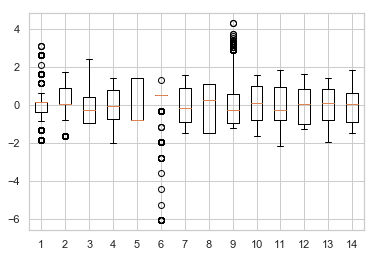

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(x=X)
plt.show()